In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.color_palette("muted")
%matplotlib inline

In [2]:
df_train = pd.read_csv("treino.csv")
df_test = pd.read_csv("teste.csv")

# Parte 1: Análise Exploratória

### Distribuição por Categoria

<AxesSubplot:xlabel='count', ylabel='obito'>

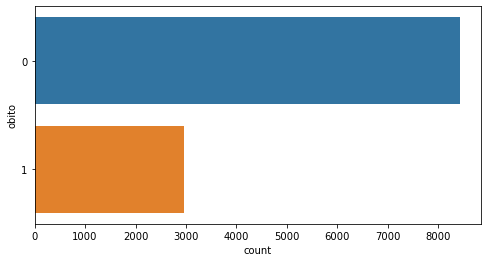

In [3]:
plt.figure(figsize=(8,4))
sb.countplot(y="obito", data=df_train)

### Distribuição por Idade da Mãe

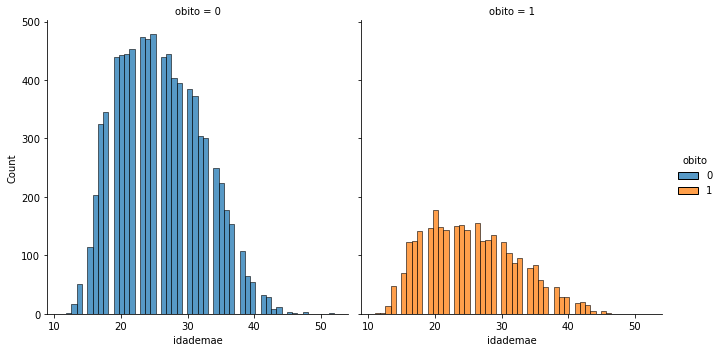

In [4]:
g = sb.displot(data=df_train, x="idademae", hue="obito", col="obito")
g.fig.set_figwidth(10)
g.fig.set_figheight(5)

### Distribuição por Estado Civil da Mãe

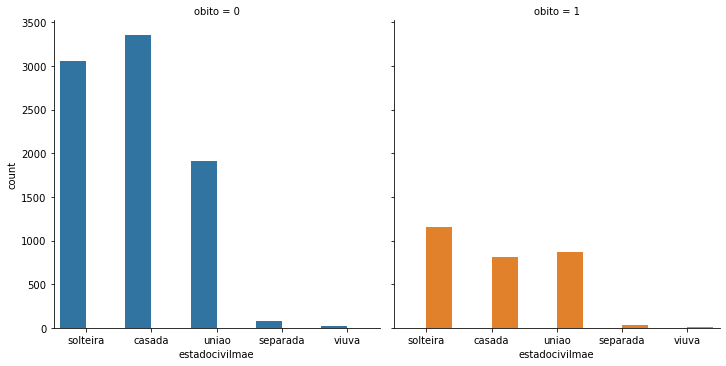

In [5]:
sb.catplot(data=df_train, x="estadocivilmae", hue="obito", col="obito", kind="count")

### Distribuição por Quantidade de Consultas de Pré-Natal Realizadas

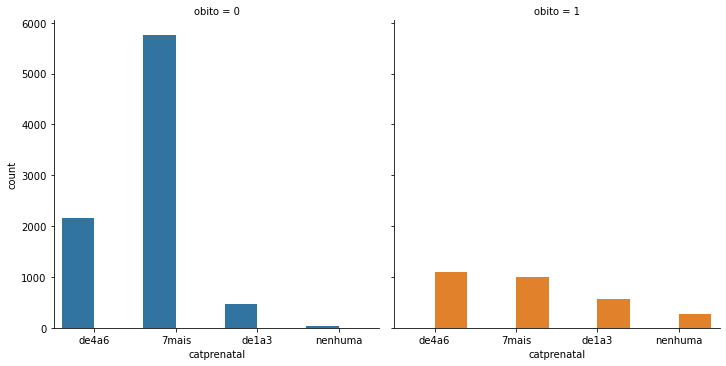

In [6]:
sb.catplot(data=df_train, x="catprenatal", hue="obito", col="obito", kind="count")

### Distribuição por Quantidade de Semanas de Gestação

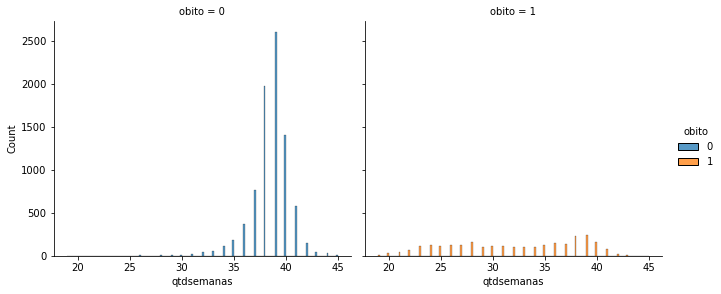

In [7]:
g = sb.displot(data=df_train, x="qtdsemanas", hue="obito", col="obito")
g.fig.set_figwidth(10)
g.fig.set_figheight(4)

### Distribuição por Tipo de Parto

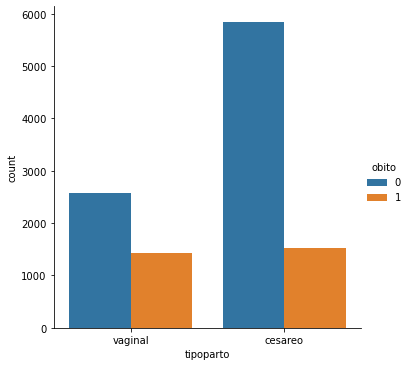

In [8]:
sb.catplot(data=df_train, x="tipoparto", hue="obito", kind="count")

### Distribuição por Peso do Bebê

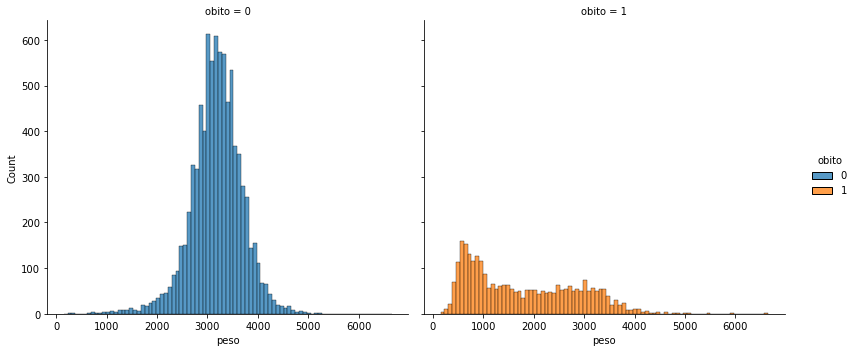

In [9]:
g = sb.displot(data=df_train, x="peso", hue="obito", col="obito")
g.fig.set_figwidth(12)
g.fig.set_figheight(5)

### Distribuição por Malformação

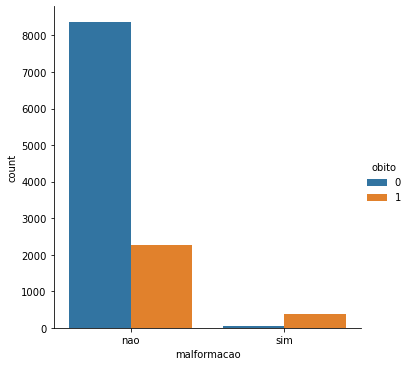

In [10]:
sb.catplot(data=df_train, x="malformacao", hue="obito", kind="count")

### Nota do Apgar 1 vs. Óbitos

<AxesSubplot:xlabel='apgar1', ylabel='Count'>

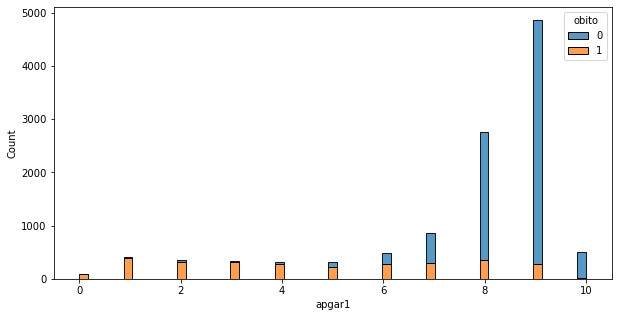

In [11]:
plt.figure(figsize=(10,5))
sb.histplot(data=df_train, x="apgar1", hue="obito", multiple="stack")

### Nota do Apgar 5 vs. Óbitos

<AxesSubplot:xlabel='apgar5', ylabel='Count'>

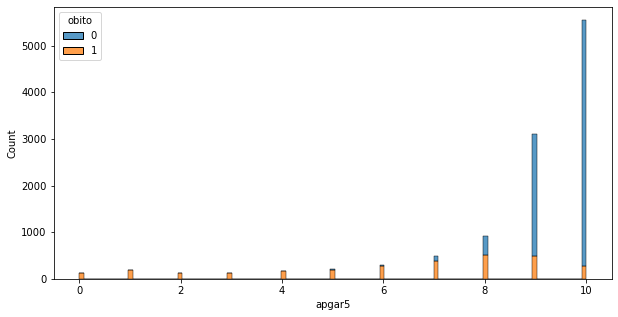

In [12]:
plt.figure(figsize=(10,5))
sb.histplot(data=df_train, x="apgar5", hue="obito", multiple="stack")

### Distribuição por Sexo do Bebê

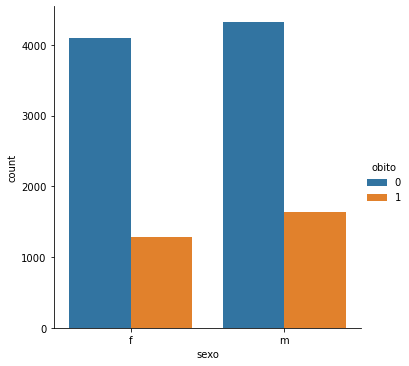

In [13]:
sb.catplot(data=df_train, x="sexo", hue="obito", kind="count")

### Matriz de Correlação - Atributos Numéricos

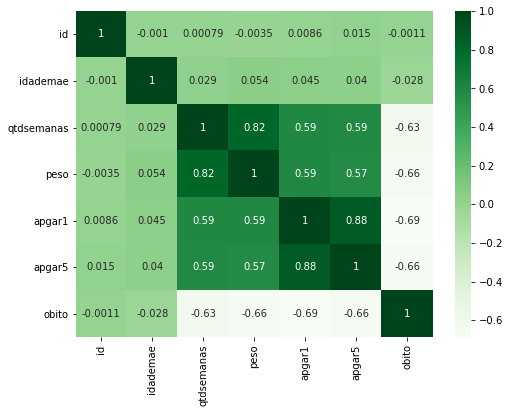

In [14]:
corr_df = df_train.corr(method='pearson')

plt.figure(figsize=(8, 6))
sb.heatmap(corr_df, annot=True, cmap='Greens')
plt.show()

# Parte 2: Pré-processamento

## 2.1 Tratamento de Valores Faltantes (Missing)

***Quantidade de registros nos datasets***

In [15]:
df_train.shape

(11389, 12)

In [16]:
df_test.shape

(4882, 11)

***Quantidade de valores nulos por coluna do dataset***

In [17]:
df_train.isnull().sum()

id                  0
idademae            0
estadocivilmae     96
catprenatal        40
qtdsemanas        226
tipoparto           5
peso                2
malformacao       304
sexo               39
apgar1            100
apgar5             95
obito               0
dtype: int64

In [18]:
df_test.isnull().sum()

id                  0
idademae            1
estadocivilmae     38
catprenatal        13
qtdsemanas         96
tipoparto           0
peso                0
malformacao       143
sexo               12
apgar1             48
apgar5             49
dtype: int64

### Atributos categóricos

*TÉCNICA ESCOLHIDA -> Substituição pelo valor que mais aparece (Moda)*

***Atributo: Estado civil da mãe***

In [19]:
df_train["estadocivilmae"].fillna(df_train["estadocivilmae"].mode()[0], inplace=True)
df_test["estadocivilmae"].fillna(df_test["estadocivilmae"].mode()[0], inplace=True)

***Atributo: Quantidade de consultas de Pré-Natal realizadas***

In [20]:
df_train["catprenatal"].fillna(df_train["catprenatal"].mode()[0], inplace=True)
df_test["catprenatal"].fillna(df_test["catprenatal"].mode()[0], inplace=True)

***Atributo: Tipo do parto***

In [21]:
df_train["tipoparto"].fillna(df_train["tipoparto"].mode()[0], inplace=True)

***Atributo: Malformação***

In [22]:
df_train["malformacao"].fillna(df_train["malformacao"].mode()[0], inplace=True)
df_test["malformacao"].fillna(df_test["malformacao"].mode()[0], inplace=True)

***Atributo: Sexo do bebê***

In [23]:
df_train["sexo"].fillna(df_train["sexo"].mode()[0], inplace=True)
df_test["sexo"].fillna(df_test["sexo"].mode()[0], inplace=True)

### Atributos numéricos

*TÉCNICA ESCOLHIDA -> Substituição pela melhor métrica entre Moda, Média ou Mediana*

***Atributo: Idade da mãe -> Mediana***

<AxesSubplot:xlabel='idademae'>

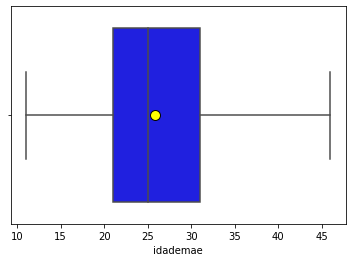

In [24]:
sb.boxplot(x=df_test["idademae"], 
           showfliers=False, 
           color="blue",
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [25]:
df_test["idademae"].fillna(df_test["idademae"].median(), inplace=True)

***Atributo: Quantidade de semanas de gestação -> Mediana***

<AxesSubplot:xlabel='qtdsemanas'>

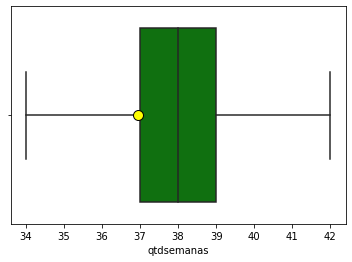

In [26]:
sb.boxplot(x=df_train["qtdsemanas"], 
           showfliers=False, 
           color="green",
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [27]:
df_train["qtdsemanas"].fillna(df_train["qtdsemanas"].median(), inplace=True)
df_test["qtdsemanas"].fillna(df_test["qtdsemanas"].median(), inplace=True)

***Atributo: Peso do bebê -> Média***

<AxesSubplot:xlabel='peso'>

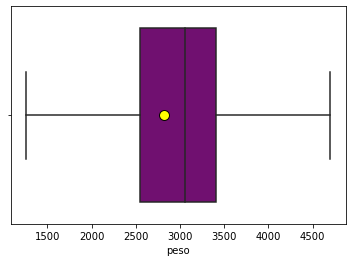

In [28]:
sb.boxplot(x=df_train["peso"], 
           showfliers=False, 
           color="purple",
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [29]:
df_train["peso"].fillna(df_train["peso"].mean(), inplace=True)

***Atributo: Nota Apgar 1 -> Média***

<AxesSubplot:xlabel='apgar1'>

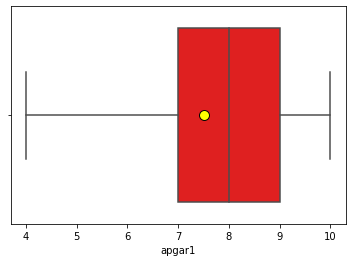

In [30]:
sb.boxplot(x=df_train["apgar1"], 
           showfliers=False, 
           color="red",
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [31]:
df_train["apgar1"].fillna(df_train["apgar1"].mean(), inplace=True)
df_test["apgar1"].fillna(df_test["apgar1"].mean(), inplace=True)

***Atributo: Nota Apgar 5 -> Média***

<AxesSubplot:xlabel='apgar5'>

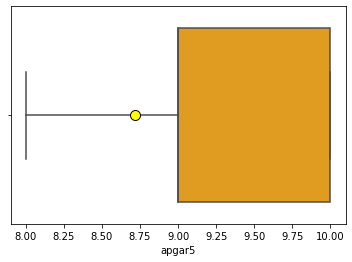

In [32]:
sb.boxplot(x=df_train["apgar5"], 
           showfliers=False, 
           color="orange",
           showmeans=True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [33]:
df_train["apgar5"].fillna(df_train["apgar5"].mean(), inplace=True)
df_test["apgar5"].fillna(df_test["apgar5"].mean(), inplace=True)

In [34]:
df_train.isnull().sum()

id                0
idademae          0
estadocivilmae    0
catprenatal       0
qtdsemanas        0
tipoparto         0
peso              0
malformacao       0
sexo              0
apgar1            0
apgar5            0
obito             0
dtype: int64

In [35]:
df_test.isnull().sum()

id                0
idademae          0
estadocivilmae    0
catprenatal       0
qtdsemanas        0
tipoparto         0
peso              0
malformacao       0
sexo              0
apgar1            0
apgar5            0
dtype: int64

## 2.2 Tratamento de Valores Discrepantes (Outliers)

*TÉCNICA ESCOLHIDA -> Nenhuma* \
*MOTIVO -> Não foi verificado nenhum valor fora do domínio para nenhum dos atributos numéricos. Não é possível saber se os valores mínimos e máximos foram erros ou se realmente ocorreram, portanto não serão excluídos os registros com tais valores*

In [36]:
df_train.describe()

,id,idademae,qtdsemanas,peso,apgar1,apgar5,obito
count,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000
mean,8139.875230,25.793748,36.973395,2818.527883,7.503765,8.716664,0.260427
std,4693.036873,6.468443,4.379469,930.493577,2.337859,2.111307,0.438887
min,0.000000,11.000000,19.000000,150.000000,0.000000,0.000000,0.000000
25%,4078.000000,21.000000,37.000000,2550.000000,7.000000,9.000000,0.000000
50%,8085.000000,25.000000,38.000000,3060.000000,8.000000,9.000000,0.000000
75%,12198.000000,30.000000,39.000000,3410.000000,9.000000,10.000000,1.000000
max,16269.000000,52.000000,45.000000,6651.000000,10.000000,10.000000,1.000000


In [37]:
print(df_train.sort_values('idademae', ascending=False).head(10)['idademae'])

6863     52.0
8623     48.0
986      48.0
3822     48.0
9715     46.0
11314    46.0
7594     46.0
6294     46.0
2671     45.0
5330     45.0
Name: idademae, dtype: float64


In [38]:
print(df_train.sort_values('idademae', ascending=True).head(10)['idademae'])

100      11.0
6812     12.0
770      12.0
0        13.0
7030     13.0
7840     13.0
7900     13.0
2740     13.0
1725     13.0
11216    13.0
Name: idademae, dtype: float64


In [39]:
print(df_train.sort_values('qtdsemanas', ascending=False).head(10)['qtdsemanas'])

2487    45.0
7656    45.0
1408    45.0
117     45.0
4389    45.0
4813    45.0
725     45.0
5670    45.0
9860    45.0
7419    44.0
Name: qtdsemanas, dtype: float64


In [40]:
print(df_train.sort_values('qtdsemanas', ascending=True).head(10)['qtdsemanas'])

191      19.0
3262     19.0
9827     19.0
6452     19.0
10108    19.0
4011     19.0
5512     19.0
353      19.0
5418     19.0
8672     19.0
Name: qtdsemanas, dtype: float64


In [41]:
print(df_train.sort_values('peso', ascending=False).head(10)['peso'])

2437    6651.0
8798    5950.0
4145    5500.0
4336    5240.0
1411    5150.0
3743    5100.0
1938    5020.0
7998    4975.0
480     4950.0
6215    4950.0
Name: peso, dtype: float64


In [42]:
print(df_train.sort_values('peso', ascending=True).head(10)['peso'])

3262     150.0
5709     160.0
6804     175.0
3223     180.0
8611     190.0
10165    230.0
4011     230.0
7179     247.0
1829     275.0
10108    280.0
Name: peso, dtype: float64


## 2.3 Transformação de Dados

### Removendo coluna de identificação dos registros

In [43]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

### Transformando atributos categóricos em numéricos

In [44]:
df_train = pd.get_dummies(df_train, drop_first=True)
df_train.head()

,idademae,qtdsemanas,peso,apgar1,apgar5,obito,estadocivilmae_separada,estadocivilmae_solteira,estadocivilmae_uniao,estadocivilmae_viuva,catprenatal_de1a3,catprenatal_de4a6,catprenatal_nenhuma,tipoparto_vaginal,malformacao_sim,sexo_m
0,13.0,36.0,2440.0,9.0,10.0,0,0,1,0,0,0,1,0,1,0,0
1,25.0,39.0,2850.0,9.0,10.0,0,0,0,0,0,0,0,0,0,0,0
2,27.0,38.0,3350.0,9.0,10.0,0,0,1,0,0,0,0,0,0,0,0
3,28.0,41.0,3065.0,8.0,9.0,0,0,1,0,0,0,0,0,1,0,1
4,21.0,39.0,3085.0,8.0,9.0,0,0,1,0,0,0,1,0,0,0,0


In [45]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.head()

,idademae,qtdsemanas,peso,apgar1,apgar5,estadocivilmae_separada,estadocivilmae_solteira,estadocivilmae_uniao,estadocivilmae_viuva,catprenatal_de1a3,catprenatal_de4a6,catprenatal_nenhuma,tipoparto_vaginal,malformacao_sim,sexo_m
0,24.0,40.0,3120.0,9.0,10.0,0,0,0,0,0,0,0,0,0,0
1,25.0,38.0,2805.0,9.0,10.0,0,0,1,0,0,0,0,0,0,0
2,16.0,39.0,3600.0,9.0,10.0,0,1,0,0,0,1,0,0,0,0
3,22.0,26.0,635.0,7.0,8.0,0,0,1,0,1,0,0,1,0,0
4,29.0,26.0,442.0,3.0,8.0,0,0,0,0,1,0,0,0,0,1


### Redimensionando os dados

*TÉCNICA ESCOLHIDA -> Normalização* \
*DESCRIÇÃO -> Coloca todos os valores na escala entre 0 e 1* \
*MOTIVO -> Menos sensível a outliers*

In [46]:
from sklearn import preprocessing
df_train_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_train.values))
df_test_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_test.values))

In [47]:
df_train_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.048780,0.653846,0.352253,0.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.341463,0.769231,0.415321,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.390244,0.730769,0.492232,0.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.414634,0.846154,0.448393,0.8,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.243902,0.769231,0.451469,0.8,0.9,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11384,0.317073,0.846154,0.433010,0.9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11385,0.292683,0.769231,0.415321,0.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
11386,0.365854,0.807692,0.564529,0.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11387,0.585366,0.769231,0.349177,0.7,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_test_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.295455,0.807692,0.488278,0.9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.318182,0.730769,0.437348,0.9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.113636,0.769231,0.565885,0.9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.250000,0.269231,0.086500,0.7,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.409091,0.269231,0.055295,0.3,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.409091,0.769231,0.638642,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4878,0.204545,0.769231,0.517381,0.9,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4879,0.318182,0.730769,0.530315,0.9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4880,0.409091,0.730769,0.557801,0.9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Parte 3: Aprendizado de máquina

## 3.1 Separando atributos (X) da variável alvo (y)

In [49]:
X = df_train_norm.drop(5, axis=1).values
y = df_train_norm[5].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3.2 Balanceamento das classes

*TÉCNICA ESCOLHIDA -> Undersampling* \
*DESCRIÇÃO -> Seleção aleatória de elementos da classe majoritária* \
*MOTIVO -> A técnica oposta (oversampling) requer maior processamento e gera dados que não são reais*

In [51]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, OneSidedSelection

# Random Undersampler
rus = RandomUnderSampler(random_state = 42)
X_rus_res, y_rus_res = rus.fit_resample(X_train, y_train)

# NearMiss
nm = NearMiss(version=1)
X_nm_res, y_nm_res = nm.fit_resample(X_train, y_train)

# OneSidedSelection (Algoritmo tipo KNN)
oss = OneSidedSelection(random_state = 42)
X_oss_res, y_oss_res = oss.fit_resample(X_train, y_train)

## 3.3 Criação dos modelos

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [53]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

## 3.4 Treino com Validação Cruzada

*Melhores Resultados: Navie Bayes com Random UnderSampler*

In [54]:
from sklearn.model_selection import cross_validate
np.random.seed(42)

In [55]:
names = []
results_rus = []
results_nm = []
results_oss = []

for name, model in models:
    rus = cross_validate(model, X_rus_res, y_rus_res, cv=10, scoring='accuracy')
    nm = cross_validate(model, X_nm_res, y_nm_res, cv=10, scoring='accuracy')
    oss = cross_validate(model, X_oss_res, y_oss_res, cv=10, scoring='accuracy')
    results_rus.append(rus['test_score'])
    results_nm.append(nm['test_score'])
    results_oss.append(oss['test_score'])
    names.append(name)

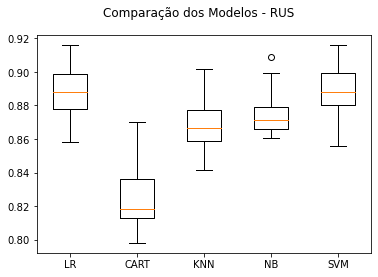

In [56]:
fig = plt.figure()
fig.suptitle('Comparação dos Modelos - RUS')
ax = fig.add_subplot(111)
plt.boxplot(results_rus)
ax.set_xticklabels(names)
plt.show()

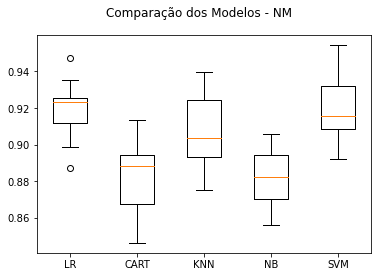

In [57]:
fig = plt.figure()
fig.suptitle('Comparação dos Modelos - NM')
ax = fig.add_subplot(111)
plt.boxplot(results_nm)
ax.set_xticklabels(names)
plt.show()

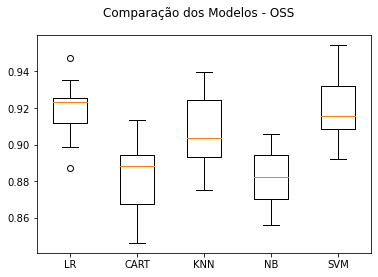

In [58]:
fig = plt.figure()
fig.suptitle('Comparação dos Modelos - OSS')
ax = fig.add_subplot(111)
plt.boxplot(results_nm)
ax.set_xticklabels(names)
plt.show()

## 3.5 Ajuste do melhor modelo

*TÉCNICA ESCOLHIDA -> Acurácia* \
*MOTIVO -> Avaliar o percentual de acertos na classificação*

In [59]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=models[3][1], param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_rus_res, y_rus_res)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.5199110829529332e-05)


In [60]:
y_pred = nbModel_grid.predict(X_test)

Text(0.5, 15.0, 'Classe predita')

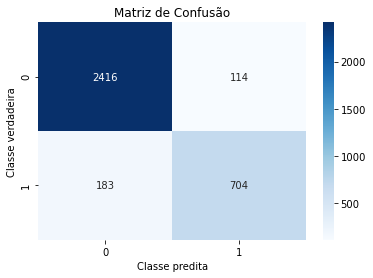

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Classe verdadeira')
plt.xlabel('Classe predita')

In [62]:
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=2))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2530
         1.0       0.86      0.79      0.83       887

    accuracy                           0.91      3417
   macro avg       0.90      0.87      0.88      3417
weighted avg       0.91      0.91      0.91      3417



# Parte 4: Avaliação

In [63]:
X_final = df_test_norm.values

In [64]:
y_final = nbModel_grid.predict(X_final)
y_final

array([0., 0., 0., ..., 0., 0., 0.])

In [65]:
y_final_proba = nbModel_grid.predict_proba(X_final)
y_final_proba = np.round(y_final_proba, 4)
y_final_proba

array([[1.    , 0.    ],
       [1.    , 0.    ],
       [1.    , 0.    ],
       ...,
       [1.    , 0.    ],
       [1.    , 0.    ],
       [0.9988, 0.0012]])

In [66]:
df_final = pd.read_csv("teste.csv")

In [67]:
df_final.head()

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5
0,5493,24.0,casada,7mais,40.0,cesareo,3120.0,nao,f,9.0,10.0
1,12311,25.0,uniao,7mais,38.0,cesareo,2805.0,nao,f,9.0,10.0
2,15520,16.0,solteira,de4a6,39.0,cesareo,3600.0,nao,f,9.0,10.0
3,15095,22.0,uniao,de1a3,26.0,vaginal,635.0,nao,f,7.0,8.0
4,2275,29.0,casada,de1a3,26.0,cesareo,442.0,nao,m,3.0,8.0


In [68]:
df_final['obito'] = y_final_proba[:,1]
df_final.head()

,id,idademae,estadocivilmae,catprenatal,qtdsemanas,tipoparto,peso,malformacao,sexo,apgar1,apgar5,obito
0,5493,24.0,casada,7mais,40.0,cesareo,3120.0,nao,f,9.0,10.0,0.0
1,12311,25.0,uniao,7mais,38.0,cesareo,2805.0,nao,f,9.0,10.0,0.0
2,15520,16.0,solteira,de4a6,39.0,cesareo,3600.0,nao,f,9.0,10.0,0.0
3,15095,22.0,uniao,de1a3,26.0,vaginal,635.0,nao,f,7.0,8.0,1.0
4,2275,29.0,casada,de1a3,26.0,cesareo,442.0,nao,m,3.0,8.0,1.0


In [69]:
df_final.to_csv('submission_danielle.csv')